In [1]:
import hurst
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import rwi

In [307]:
lookback = 50
ts = hurst.random_walk(10000, proba=0.30,  min_lookback=lookback, max_lookback=lookback,)

In [308]:
ts = (100+pd.Series(ts)).dropna()

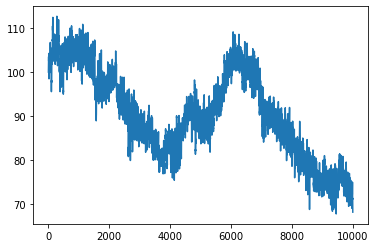

In [309]:
ts.plot()

In [341]:
df = pd.DataFrame(ts, columns=['price'])

In [342]:
df = rwi.generate_features(df).dropna()

In [343]:
df['shift_returns'] = df['returns'].shift(-1)

In [344]:
df.dropna(inplace=True)

In [345]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression

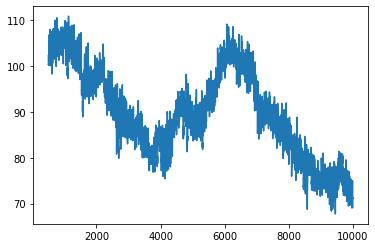

In [346]:
df.price.plot()

In [347]:
df = df[df.returns != 0.0]

In [352]:
X = df.drop(columns=['shift_returns', 'price']) #  'returns', 'ROC_2', 'ROC_3'
y = np.sign(df['shift_returns'])

In [353]:
from sklearn.model_selection import train_test_split, cross_val_score

In [354]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [355]:
model = LogisticRegression(max_iter = 1000) #Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [356]:
pred_proba = model.predict_proba(X_test)

In [357]:
model.score(X_test, y_test)

0.5078947368421053

In [358]:
from sklearn.metrics import  r2_score, mean_squared_error,  explained_variance_score, accuracy_score, f1_score, roc_auc_score

In [359]:
print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

0.5078947368421053 0.531328320802005 0.5074665981101905


In [360]:
from sklearn.metrics import confusion_matrix

In [361]:
confusion_matrix(y_test, y_pred, labels=[-1., 1.])


array([[435, 506],
       [429, 530]], dtype=int64)

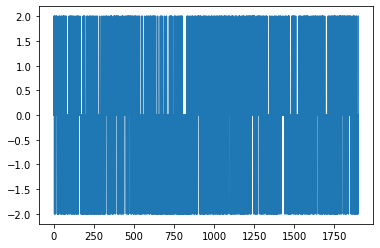

In [362]:
plt.plot([x for x in range(len(y_pred))],y_test-y_pred)

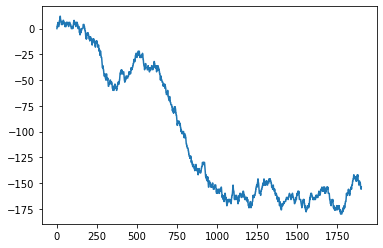

In [363]:
plt.plot(np.cumsum((y_test-y_pred).values))


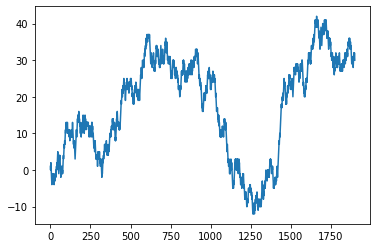

In [364]:
plt.plot(np.cumsum((y_test*y_pred).values))


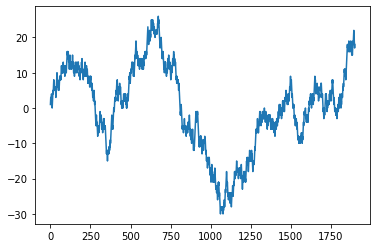

In [365]:
plt.plot(np.cumsum(y_test.values))

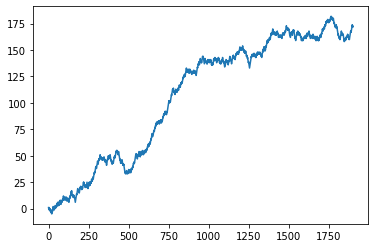

In [366]:
plt.plot(np.cumsum(y_pred))

In [367]:
# https://www.pythonforfinance.net/2016/05/09/python-backtesting-mean-reversion-part-2/

In [368]:
def rollingRegression(X_, y_):
    X_train_, X_test_, y_train_, y_test_ = train_test_split( X_, y_, test_size=0.20, random_state=42)
    
    model = LogisticRegression(max_iter = 500) #Lasso(alpha=0.01) #Lasso(alpha=0.01)
    model.fit(X_train_, y_train_)
    y_pred_ = model.predict(X_test_)
    return f1_score(y_pred_, y_test_)

In [369]:
df.shape

(9499, 11)

In [370]:
p = 100
chunk =100
res = []
for i in range(p, len(df)-1): # 
    
    X_rol= X.iloc[p:p+chunk]
    y_rol = y.iloc[p:p+chunk]
    if len(X_rol) !=0:
        res.append(rollingRegression(X_rol, y_rol))

    p+=chunk
    

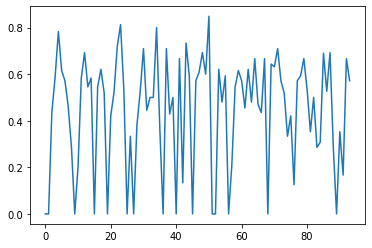

In [371]:
plt.plot(res)

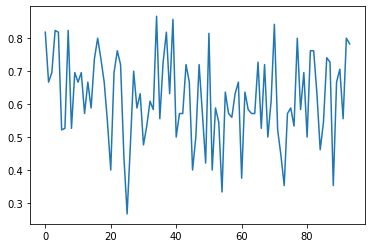

In [336]:
plt.plot(res)

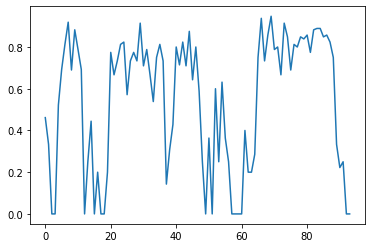

In [306]:
plt.plot(res)

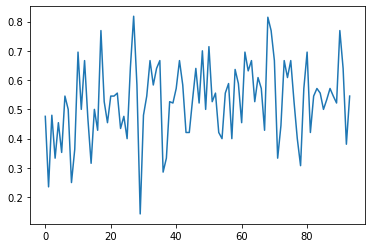

In [274]:
plt.plot(res)

In [275]:
np.mean(res)

0.5299255241347902

In [227]:
#### trend prediction

In [228]:
temp = df.copy()

In [229]:
df = temp.copy()
df['shift_returns'] = df['ROC_20'].shift(-20)

In [230]:
df.dropna(inplace=True)
X = df.drop(columns=['shift_returns', 'price', 'returns', 'ROC_2', 'ROC_3', 'ROC_5']) #  'returns', 'ROC_2', 'ROC_3'
y = df['shift_returns']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
model = Lasso(alpha=0.01) #Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.03656963664658286
4.2685834811843675


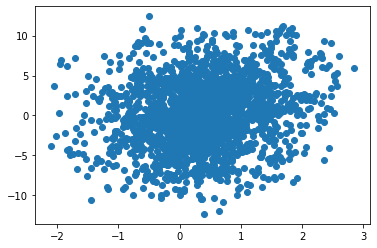

In [231]:
plt.scatter(y_pred,y_test)
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

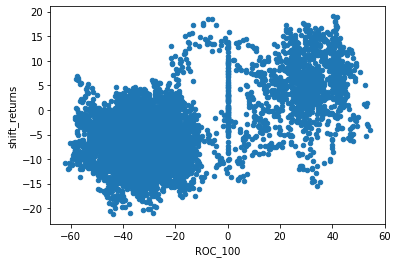

In [1007]:
df[['ROC_100', 'shift_returns']].plot.scatter(x='ROC_100', y='shift_returns')

In [882]:
### resample

In [989]:
df = pd.DataFrame(ts, columns=['price'])


In [977]:
df = df.reset_index(drop=True)
df = df.reset_index()
df['index'] = df['index'].apply(lambda x : x // 10)
df = df.groupby('index').last()

In [990]:
df= rwi.generate_features(df)

In [991]:
df['shift_returns'] = df['returns'].shift(-1)

In [996]:
df.dropna(inplace=True)
#df = df.fillna(0)

In [997]:
X = df.drop(columns=['shift_returns', 'price']) #  'returns', 'ROC_2', 'ROC_3'
y = df['shift_returns']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
model = Lasso(alpha=0.01) #Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.03468403483782745
0.962872342354406


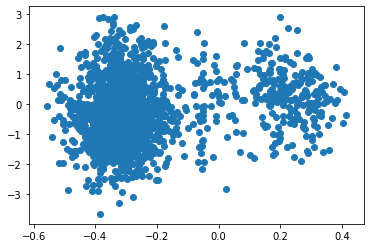

In [998]:
plt.scatter(y_pred,y_test)
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

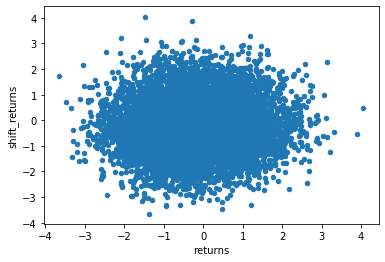

In [999]:
df[['returns', 'shift_returns']].plot.scatter(x='returns', y='shift_returns')

In [276]:
"""
- Logistic Market model
- controlled experiment
- controlled experiemtn 2
- market predictability. Hurst, Correlations
- Practical application: 1) ML model, 2) hurst + MA
- Market Regimes

- Quant portfolio
- 

"""

'\n- Logistic Market model\n- controlled experiment\n- controlled experiemtn 2\n- market predictability. Hurst, Correlations\n- Practical application: 1) ML model, 2) hurst + MA\n- Market Regimes\n\n- Quant portfolio\n- \n\n'